In [138]:
# This notebook is the EDA for the accepted_2017_reduced.csv created in reduce_data.ipynb
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [139]:
# eliminate the truncation of output in pandas dataframes
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [140]:
# Load the reduced dataset
df = pd.read_csv("../data/accepted_2017_reduced.csv")   # adjust if needed
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,120113784,35000.0,35000.0,35000.0,60 months,12.62,789.57,C,C1,Supervisor,10+ years,MORTGAGE,85000.0,Source Verified,2017-09-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=120113784,house,Home buying,112xx,NY,12.14,0.0,Apr-1998,680.0,684.0,0.0,61.0,7.0,1.0,6029.0,30.6,17.0,w,0.0,0.0,39723.460669,39723.46,35000.0,4723.46,0.0,0.0,0.0,Dec-2018,29508.13,Dec-2018,699.0,695.0,0.0,1.0,Individual,0.0,0.0,21567.0,1.0,2.0,2.0,3.0,4.0,15538.0,73.0,2.0,3.0,3570.0,53.0,19700.0,0.0,0.0,3.0,6.0,3081.0,12471.0,32.6,0.0,0.0,167.0,233.0,12.0,4.0,2.0,12.0,12.0,0.0,4.0,4.0,4.0,6.0,7.0,5.0,8.0,4.0,7.0,0.0,0.0,0.0,4.0,92.3,25.0,1.0,0.0,40953.0,21567.0,18500.0,21253.0,N,Cash,N
1,120037097,10000.0,10000.0,10000.0,36 months,15.05,346.90,C,C4,Teller,1 year,RENT,10000.0,Verified,2017-09-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=120037097,debt_consolidation,Debt consolidation,412xx,KY,49.94,0.0,Apr-1997,705.0,709.0,3.0,NaN,13.0,0.0,16253.0,24.7,16.0,w,0.0,0.0,10682.292600,10682.29,10000.0,682.29,0.0,0.0,0.0,Mar-2018,9311.41,Mar-2019,694.0,690.0,0.0,1.0,Joint App,0.0,0.0,16253.0,2.0,0.0,0.0,0.0,NaN,0.0,NaN,4.0,8.0,6581.0,25.0,65700.0,0.0,0.0,5.0,8.0,1250.0,44147.0,26.9,0.0,0.0,NaN,245.0,5.0,5.0,0.0,5.0,5.0,0.0,10.0,10.0,11.0,13.0,0.0,13.0,16.0,10.0,13.0,0.0,0.0,0.0,4.0,100.0,9.1,0.0,0.0,65700.0,16253.0,60400.0,0.0,N,Cash,N
2,120122709,10000.0,10000.0,10000.0,60 months,13.59,230.57,C,C2,Legal Assistant,3 years,MORTGAGE,58000.0,Not Verified,2017-09-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=120122709,debt_consolidation,Debt consolidation,080xx,NJ,21.64,0.0,Jan-1984,675.0,679.0,0.0,57.0,15.0,1.0,11464.0,31.9,47.0,w,0.0,0.0,11239.973775,11239.97,10000.0,1239.97,0.0,0.0,0.0,Sep-2018,8949.37,Feb-2019,644.0,640.0,0.0,1.0,Individual,0.0,374.0,146107.0,0.0,2.0,0.0,1.0,16.0,28901.0,87.0,1.0,7.0,6021.0,59.0,35900.0,0.0,0.0,1.0,8.0,10436.0,7485.0,57.0,0.0,0.0,92.0,404.0,12.0,12.0,3.0,24.0,12.0,0.0,3.0,6.0,4.0,17.0,4.0,12.0,40.0,6.0,15.0,0.0,0.0,0.0,1.0,97.4,50.0,1.0,0.0,218992.0,40365.0,17400.0,33092.0,N,Cash,N
3,120087572,1000.0,1000.0,1000.0,36 months,15.05,34.69,C,C4,Senior Community Coordinator,7 years,RENT,43000.0,Verified,2017-09-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=120087572,moving,Moving and relocation,482xx,MI,19.29,0.0,Nov-2007,695.0,699.0,0.0,NaN,8.0,0.0,17079.0,43.2,14.0,w,0.0,0.0,379.920000,379.92,259.5,120.42,0.0,0.0,0.0,Sep-2018,34.69,Dec-20

In [141]:
# shape of df
df.shape

(178817, 108)

In [142]:
# check descriptive stats
df.describe(include='all')

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
count,1.788170e+05,178817.000000,178817.000000,178817.000000,178817,178817.000000,178817.000000,178817,178817,165681,165867,178817,1.788170e+05,178817,178817,178817,178817,178817,178817,178817,178816,178817,178623.000000,178817.000000,178817,178817.000000,178817.000000,178817.000000,90132.000000,178817.000000,178817.000000,1.788170e+05,178656.000000,178817.000000,178817,178817.000000,178817.000000,178817.000000,178817.000000,178817.000000,178817.000000,178817.000000,178817.000000,178817.000000,178217,178817.000000,178814,178817.000000,178817.000000,178817.000000,178817.0,178817,178817.000000,178817.000000,1.788170e+05,178817.000000,178817.000000,178817.000000,178817.000000,174137.000000,1.788170e+05,154613.000000,178817.000000,178817.000000,178817.000000,178795.000000,1.788170e+05,178817.000000,178817.000000,178817.000000,178817.000000,178812.000000,176464.000000,176367.000000,178817.000000,178817.000000,174137.000000,178817.000000,178817.000000,178817.000000,178817.000000,176582.000000,162639.000000,178817.000000,178817.000000,178817.000000,178817.000000,178817.000000,178817.000000,178817.000000,178817.000000,178817.000000,178817.000000,169486.000000,178817.000000,178817.000000,178817.000000,178817.000000,176456.000000,178817.000000,178817.000000,1.788170e+05,1.788170e+05,178817.000000,1.788170e+05,178817,178817,178817
unique,NaN,NaN,NaN,NaN,2,NaN,NaN,7,35,58362,11,5,NaN,3,12,5,2,178817,12,12,886,50,NaN,NaN,654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,NaN,28,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2
top,NaN,NaN,NaN,NaN,36 months,NaN,NaN,C,C5,Manager,10+ years,MORTGAGE,NaN,Source Verified,2017-03-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=120113784,debt_consolidation,Debt consolidation,945xx,CA,NaN,NaN,Aug-2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aug-2018,NaN,Mar-2019,NaN,NaN,NaN,NaN,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,Cash,N
freq,NaN,NaN,NaN,NaN,134609,NaN,NaN,58555,12880,3177,58659,88952,NaN,70836,17664,130152,178517,1,100639,100634,2028,25682,NaN,NaN,1462,Na

In [143]:
# all features I have and their descriptions
dict_approved = pd.read_csv("../data/data_dictionary_approved.csv")
dict_notes = pd.read_csv("../data/data_dictionary_notes.csv", encoding="ISO-8859-1", header=None)
dict_reject   = pd.read_csv("../data/data_dictionary_reject.csv", encoding="ISO-8859-1", header=None)

#  define columns
for d in (dict_approved, dict_notes, dict_reject):
    d.columns = ["feature", "description"]

# combine dictionaries and merge with features in df
dict_all = pd.concat([dict_approved, dict_notes, dict_reject], ignore_index=True)
dict_all = dict_all.drop_duplicates(subset="feature")
features = pd.DataFrame({"feature": df.columns})

feature_desc_table = features.merge(dict_all, on="feature", how="left")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

feature_desc_table


,feature,description
0,id,A unique LC assigned ID for the loan listing.
1,loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
2,funded_amnt,The total amount committed to that loan at that point in time.
3,funded_amnt_inv,The total amount committed by investors for that loan at that point in time.
4,term,The number of payments on the loan. Values are in months and can be either 36 or 60.
5,int_rate,Interest Rate on the loan
6,installment,The monthly payment owed by the borrower if the loan originates.
7,grade,LC assigned loan grade
8,sub_grade,LC assigned loan subgrade
9,emp_title,The job title supplied by the Borrower when applying for the loan.*


In [144]:
# remove features that are based on future outcomes not useful in credit decisioning
future_outcome_features = [
    "out_prncp",
    "out_prncp_inv",
    "total_pymnt",
    "total_pymnt_inv",
    "total_rec_prncp",
    "total_rec_int",
    "total_rec_late_fee",
    "recoveries",
    "collection_recovery_fee",
    "last_pymnt_d",
    "last_pymnt_amnt",
    "last_credit_pull_d",
    "last_fico_range_low",
    "last_fico_range_high",
    "hardship_flag",
    "debt_settlement_flag"
]

# Drop these columns from your DataFrame
df = df.drop(columns=future_outcome_features)

# Check results
df.shape, df.columns

((178817, 92),
 Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
        'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
        'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
        'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
        'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
        'fico_range_low', 'fico_range_high', 'inq_last_6mths',
        'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
        'revol_util', 'total_acc', 'initial_list_status',
        'collections_12_mths_ex_med', 'policy_code', 'application_type',
        'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
        'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
        'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
        'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
        'acc_open_past_24mths', 'avg_cur_bal', 

In [145]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method
0,120113784,35000.0,35000.0,35000.0,60 months,12.62,789.57,C,C1,Supervisor,10+ years,MORTGAGE,85000.0,Source Verified,2017-09-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=120113784,house,Home buying,112xx,NY,12.14,0.0,Apr-1998,680.0,684.0,0.0,61.0,7.0,1.0,6029.0,30.6,17.0,w,0.0,1.0,Individual,0.0,0.0,21567.0,1.0,2.0,2.0,3.0,4.0,15538.0,73.0,2.0,3.0,3570.0,53.0,19700.0,0.0,0.0,3.0,6.0,3081.0,12471.0,32.6,0.0,0.0,167.0,233.0,12.0,4.0,2.0,12.0,12.0,0.0,4.0,4.0,4.0,6.0,7.0,5.0,8.0,4.0,7.0,0.0,0.0,0.0,4.0,92.3,25.0,1.0,0.0,40953.0,21567.0,18500.0,21253.0,Cash
1,120037097,10000.0,10000.0,10000.0,36 months,15.05,346.90,C,C4,Teller,1 year,RENT,10000.0,Verified,2017-09-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=120037097,debt_consolidation,Debt consolidation,412xx,KY,49.94,0.0,Apr-1997,705.0,709.0,3.0,NaN,13.0,0.0,16253.0,24.7,16.0,w,0.0,1.0,Joint App,0.0,0.0,16253.0,2.0,0.0,0.0,0.0,NaN,0.0,NaN,4.0,8.0,6581.0,25.0,65700.0,0.0,0.0,5.0,8.0,1250.0,44147.0,26.9,0.0,0.0,NaN,245.0,5.0,5.0,0.0,5.0,5.0,0.0,10.0,10.0,11.0,13.0,0.0,13.0,16.0,10.0,13.0,0.0,0.0,0.0,4.0,100.0,9.1,0.0,0.0,65700.0,16253.0,60400.0,0.0,Cash
2,120122709,10000.0,10000.0,10000.0,60 months,13.59,230.57,C,C2,Legal Assistant,3 years,MORTGAGE,58000.0,Not Verified,2017-09-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=120122709,debt_consolidation,Debt consolidation,080xx,NJ,21.64,0.0,Jan-1984,675.0,679.0,0.0,57.0,15.0,1.0,11464.0,31.9,47.0,w,0.0,1.0,Individual,0.0,374.0,146107.0,0.0,2.0,0.0,1.0,16.0,28901.0,87.0,1.0,7.0,6021.0,59.0,35900.0,0.0,0.0,1.0,8.0,10436.0,7485.0,57.0,0.0,0.0,92.0,404.0,12.0,12.0,3.0,24.0,12.0,0.0,3.0,6.0,4.0,17.0,4.0,12.0,40.0,6.0,15.0,0.0,0.0,0.0,1.0,97.4,50.0,1.0,0.0,218992.0,40365.0,17400.0,33092.0,Cash
3,120087572,1000.0,1000.0,1000.0,36 months,15.05,34.69,C,C4,Senior Community Coordinator,7 years,RENT,43000.0,Verified,2017-09-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=120087572,moving,Moving and relocation,482xx,MI,19.29,0.0,Nov-2007,695.0,699.0,0.0,NaN,8.0,0.0,17079.0,43.2,14.0,w,0.0,1.0,Individual,0.0,0.0,28669.0,2.0,2.0,0.0,1.0,22.0,11590.0,59.0,2.0,4.0,4890.0,49.0,39500.0,0.0,0.0,0.0,5.0,3584.0,19882.0,45.8,0.0,0.0,97.0,118.0,6.0,6.0,0.0,6.0,23.0,0.0,4.0,5.0,5.0,7.0,4.0,6.0,9.0,5.0,8.0,0.0,0.0,0.0,2.0,100.0,20.0,0.0,0.0,59000.0,28669.0,36700.0,19500.0,Cash
4,120044125,4000.0,4000.0,4000.0,36 months,16.02,140.67,C,C5,NaN,NaN,RENT,13000.0,Source Verified,2017-09-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=120044125,car,Car financing,960xx,CA,11.08,0.0,May-2008,710.0,714.0,0.0,NaN,2.0,0.0,4184.0,76.1,3.0,w,0.0,1.0,Individual,0.0,0.0,4184.0,1.0,0.0,0.0,0.0,NaN,0.0,NaN,1.0,

In [146]:
# check descriptive stats
df.describe(include='all')

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method
count,1.788170e+05,178817.000000,178817.000000,178817.000000,178817,178817.000000,178817.000000,178817,178817,165681,165867,178817,1.788170e+05,178817,178817,178817,178817,178817,178817,178817,178816,178817,178623.000000,178817.000000,178817,178817.000000,178817.000000,178817.000000,90132.000000,178817.000000,178817.000000,1.788170e+05,178656.000000,178817.000000,178817,178817.000000,178817.0,178817,178817.000000,178817.000000,1.788170e+05,178817.000000,178817.000000,178817.000000,178817.000000,174137.000000,1.788170e+05,154613.000000,178817.000000,178817.000000,178817.000000,178795.000000,1.788170e+05,178817.000000,178817.000000,178817.000000,178817.000000,178812.000000,176464.000000,176367.000000,178817.000000,178817.000000,174137.000000,178817.000000,178817.000000,178817.000000,178817.000000,176582.000000,162639.000000,178817.000000,178817.000000,178817.000000,178817.000000,178817.000000,178817.000000,178817.000000,178817.000000,178817.000000,178817.000000,169486.000000,178817.000000,178817.000000,178817.000000,178817.000000,176456.000000,178817.000000,178817.000000,1.788170e+05,1.788170e+05,178817.000000,1.788170e+05,178817
unique,NaN,NaN,NaN,NaN,2,NaN,NaN,7,35,58362,11,5,NaN,3,12,5,2,178817,12,12,886,50,NaN,NaN,654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,36 months,NaN,NaN,C,C5,Manager,10+ years,MORTGAGE,NaN,Source Verified,2017-03-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=120113784,debt_consolidation,Debt consolidation,945xx,CA,NaN,NaN,Aug-2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,w,NaN,NaN,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
freq,NaN,NaN,NaN,NaN,134609,NaN,NaN,58555,12880,3177,58659,88952,NaN,70836,17664,130152,178517,1,100639,100634,2028,25682,NaN,NaN,1462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133409,NaN,NaN,164659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177847
mean,1.105633e+08,14417.128824,14417.128824,14412.930258,NaN,14.004035,442.692238,NaN,NaN,NaN,NaN,NaN,7.883489e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.907232,0.324164,NaN,698.920125,702.920349,0.585671,34.429803,11.658975,0.241974,1.534695e+04,46.092626,24.143062,NaN,0.023085,1.0,NaN,0.004608,246.235134,1

In [147]:
# removing more features based on domain knowledge and review of the features
#remove id, url, pymnt_plan, issue_d, policy_code,acc_now_delinq, emp_title,zip_code
# List of features to remove based on domain knowledge
features_to_drop = [
    "id",
    "url",
    "pymnt_plan",
    "issue_d",
    "policy_code",
    "acc_now_delinq",
    "emp_title",
    "zip_code"
]

# Drop these columns from your DataFrame
df = df.drop(columns=features_to_drop)

df.shape, df.columns

((178817, 84),
 Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
        'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
        'annual_inc', 'verification_status', 'loan_status', 'purpose', 'title',
        'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
        'fico_range_low', 'fico_range_high', 'inq_last_6mths',
        'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
        'revol_util', 'total_acc', 'initial_list_status',
        'collections_12_mths_ex_med', 'application_type', 'tot_coll_amt',
        'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m',
        'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
        'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
        'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
        'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
        'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
  

In [148]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,application_type,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method
0,35000.0,35000.0,35000.0,60 months,12.62,789.57,C,C1,10+ years,MORTGAGE,85000.0,Source Verified,Fully Paid,house,Home buying,NY,12.14,0.0,Apr-1998,680.0,684.0,0.0,61.0,7.0,1.0,6029.0,30.6,17.0,w,0.0,Individual,0.0,21567.0,1.0,2.0,2.0,3.0,4.0,15538.0,73.0,2.0,3.0,3570.0,53.0,19700.0,0.0,0.0,3.0,6.0,3081.0,12471.0,32.6,0.0,0.0,167.0,233.0,12.0,4.0,2.0,12.0,12.0,0.0,4.0,4.0,4.0,6.0,7.0,5.0,8.0,4.0,7.0,0.0,0.0,0.0,4.0,92.3,25.0,1.0,0.0,40953.0,21567.0,18500.0,21253.0,Cash
1,10000.0,10000.0,10000.0,36 months,15.05,346.90,C,C4,1 year,RENT,10000.0,Verified,Fully Paid,debt_consolidation,Debt consolidation,KY,49.94,0.0,Apr-1997,705.0,709.0,3.0,NaN,13.0,0.0,16253.0,24.7,16.0,w,0.0,Joint App,0.0,16253.0,2.0,0.0,0.0,0.0,NaN,0.0,NaN,4.0,8.0,6581.0,25.0,65700.0,0.0,0.0,5.0,8.0,1250.0,44147.0,26.9,0.0,0.0,NaN,245.0,5.0,5.0,0.0,5.0,5.0,0.0,10.0,10.0,11.0,13.0,0.0,13.0,16.0,10.0,13.0,0.0,0.0,0.0,4.0,100.0,9.1,0.0,0.0,65700.0,16253.0,60400.0,0.0,Cash
2,10000.0,10000.0,10000.0,60 months,13.59,230.57,C,C2,3 years,MORTGAGE,58000.0,Not Verified,Fully Paid,debt_consolidation,Debt consolidation,NJ,21.64,0.0,Jan-1984,675.0,679.0,0.0,57.0,15.0,1.0,11464.0,31.9,47.0,w,0.0,Individual,374.0,146107.0,0.0,2.0,0.0,1.0,16.0,28901.0,87.0,1.0,7.0,6021.0,59.0,35900.0,0.0,0.0,1.0,8.0,10436.0,7485.0,57.0,0.0,0.0,92.0,404.0,12.0,12.0,3.0,24.0,12.0,0.0,3.0,6.0,4.0,17.0,4.0,12.0,40.0,6.0,15.0,0.0,0.0,0.0,1.0,97.4,50.0,1.0,0.0,218992.0,40365.0,17400.0,33092.0,Cash
3,1000.0,1000.0,1000.0,36 months,15.05,34.69,C,C4,7 years,RENT,43000.0,Verified,Charged Off,moving,Moving and relocation,MI,19.29,0.0,Nov-2007,695.0,699.0,0.0,NaN,8.0,0.0,17079.0,43.2,14.0,w,0.0,Individual,0.0,28669.0,2.0,2.0,0.0,1.0,22.0,11590.0,59.0,2.0,4.0,4890.0,49.0,39500.0,0.0,0.0,0.0,5.0,3584.0,19882.0,45.8,0.0,0.0,97.0,118.0,6.0,6.0,0.0,6.0,23.0,0.0,4.0,5.0,5.0,7.0,4.0,6.0,9.0,5.0,8.0,0.0,0.0,0.0,2.0,100.0,20.0,0.0,0.0,59000.0,28669.0,36700.0,19500.0,Cash
4,4000.0,4000.0,4000.0,36 months,16.02,140.67,C,C5,NaN,RENT,13000.0,Source Verified,Fully Paid,car,Car financing,CA,11.08,0.0,May-2008,710.0,714.0,0.0,NaN,2.0,0.0,4184.0,76.1,3.0,w,0.0,Individual,0.0,4184.0,1.0,0.0,0.0,0.0,NaN,0.0,NaN,1.0,1.0,3278.0,76.0,5500.0,0.0,0.0,1.0,1.0,2092.0,1316.0,76.1,0.0,0.0,NaN,112.0,3.0,3.0,0.0,3.0,7.0,0.0,2.0,2.0,2.0,3.0,0.0,2.0,3.0,2.0,2.0,0.0,0.0,0.0,1.0,100.0,50.0,0.0,0.0,5500.0,4184.0,5500.0,0.0,Cash


In [149]:
# check descriptive stats
df.describe(include='all')

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,application_type,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method
count,178817.000000,178817.000000,178817.000000,178817,178817.000000,178817.000000,178817,178817,165867,178817,1.788170e+05,178817,178817,178817,178817,178817,178623.000000,178817.000000,178817,178817.000000,178817.000000,178817.000000,90132.000000,178817.000000,178817.000000,1.788170e+05,178656.000000,178817.000000,178817,178817.000000,178817,178817.000000,1.788170e+05,178817.000000,178817.000000,178817.000000,178817.000000,174137.000000,1.788170e+05,154613.000000,178817.000000,178817.000000,178817.000000,178795.000000,1.788170e+05,178817.000000,178817.000000,178817.000000,178817.000000,178812.000000,176464.000000,176367.000000,178817.000000,178817.000000,174137.000000,178817.000000,178817.000000,178817.000000,178817.000000,176582.000000,162639.000000,178817.000000,178817.000000,178817.000000,178817.000000,178817.000000,178817.000000,178817.000000,178817.000000,178817.000000,178817.000000,169486.000000,178817.000000,178817.000000,178817.000000,178817.000000,176456.000000,178817.000000,178817.000000,1.788170e+05,1.788170e+05,178817.000000,1.788170e+05,178817
unique,NaN,NaN,NaN,2,NaN,NaN,7,35,11,5,NaN,3,5,12,12,50,NaN,NaN,654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,36 months,NaN,NaN,C,C5,10+ years,MORTGAGE,NaN,Source Verified,Fully Paid,debt_consolidation,Debt consolidation,CA,NaN,NaN,Aug-2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,w,NaN,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
freq,NaN,NaN,NaN,134609,NaN,NaN,58555,12880,58659,88952,NaN,70836,130152,100639,100634,25682,NaN,NaN,1462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133409,NaN,164659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177847
mean,14417.128824,14417.128824,14412.930258,NaN,14.004035,442.692238,NaN,NaN,NaN,NaN,7.883489e+04,NaN,NaN,NaN,NaN,NaN,18.907232,0.324164,NaN,698.920125,702.920349,0.585671,34.429803,11.658975,0.241974,1.534695e+04,46.092626,24.143062,NaN,0.023085,NaN,246.235134,1.477661e+05,1.010178,2.786150,0.728807,1.733851,19.074436,3.614572e+04,70.608067,1.403038,2.989755,5470.366967,56.950860,3.455528e+04,1.137213,1.612162,2.310468,5.039677,14157.951648,12564.158055,52.988547,0.009708,17.709972,123.655065,176.563537,13.038827,7.531186,1.486660,22.420269,6.537700,0.547314,3.540536,5.391423,4.781727,7.417913,8.757719,8.192951,13.679678

In [150]:
#  analyze missing values from features
missing = df.isna().mean() * 100
missing_df = pd.DataFrame(missing, columns=['missing_percent'])

# Sort from greatest to least
missing_df = missing_df.sort_values('missing_percent', ascending=False)

missing_df

,missing_percent
mths_since_last_delinq,49.595396
il_util,13.535626
mths_since_recent_inq,9.047238
emp_length,7.242041
num_tl_120dpd_2m,5.218184
mo_sin_old_il_acct,2.617201
mths_since_rcnt_il,2.617201
bc_util,1.370116
percent_bc_gt_75,1.320344
bc_open_to_buy,1.315870


In [151]:
#drop features with more than 30% missing values
threshold = 30.0
features_to_drop = missing_df[missing_df['missing_percent'] > threshold].index.tolist()
df = df.drop(columns=features_to_drop)

In [152]:
df.shape, df.columns

((178817, 83),
 Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
        'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
        'annual_inc', 'verification_status', 'loan_status', 'purpose', 'title',
        'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
        'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
        'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
        'initial_list_status', 'collections_12_mths_ex_med', 'application_type',
        'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il',
        'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
        'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
        'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
        'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
        'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
        'mo_sin_old_rev_tl_op', 'mo_

In [153]:
# check target distribution
df['loan_status'].value_counts()

loan_status
Fully Paid            130152
Charged Off            39148
Late (31-120 days)      8004
Late (16-30 days)       1492
Default                   21
Name: count, dtype: int64

In [154]:
# check target distribution percentages
df['loan_status'].value_counts(normalize=True) * 100

loan_status
Fully Paid            72.785026
Charged Off           21.892773
Late (31-120 days)     4.476084
Late (16-30 days)      0.834373
Default                0.011744
Name: proportion, dtype: float64

/var/folders/c9/4lmf4c5n2q9fnm1238mvpkqc0000gn/T/ipykernel_28319/613479769.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


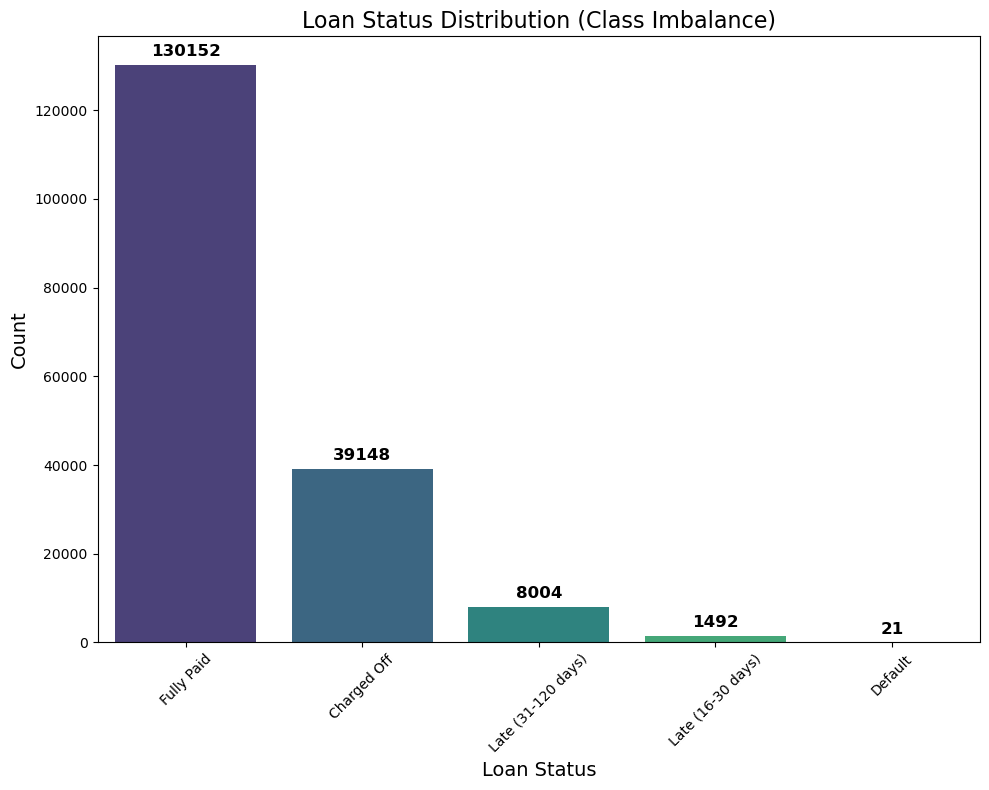

In [155]:
#  plot target distribution

# Count values in the order they appear (descending)
counts = df['loan_status'].value_counts()
order = counts.index

plt.figure(figsize=(10, 8))
ax = sns.countplot(
    data=df,
    x='loan_status',
    order=order,
    palette="viridis"
)

# --- Add data labels ---
for i, count in enumerate(counts):
    ax.text(
        i,                              # x coordinate
        count + (0.01 * max(counts)),   # y coordinate slightly above bar
        str(count),                     # text (count)
        ha='center', va='bottom', 
        fontsize=12, fontweight='bold'
    )

plt.title("Loan Status Distribution (Class Imbalance)", fontsize=16)
plt.xlabel("Loan Status", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [156]:
# list of features in the reduced dataset
print(df.columns.tolist())


['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'loan_status', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'collections_12_mths_ex_med', 'application_type', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', '

In [157]:
df["loan_status"].isna().sum()

np.int64(0)

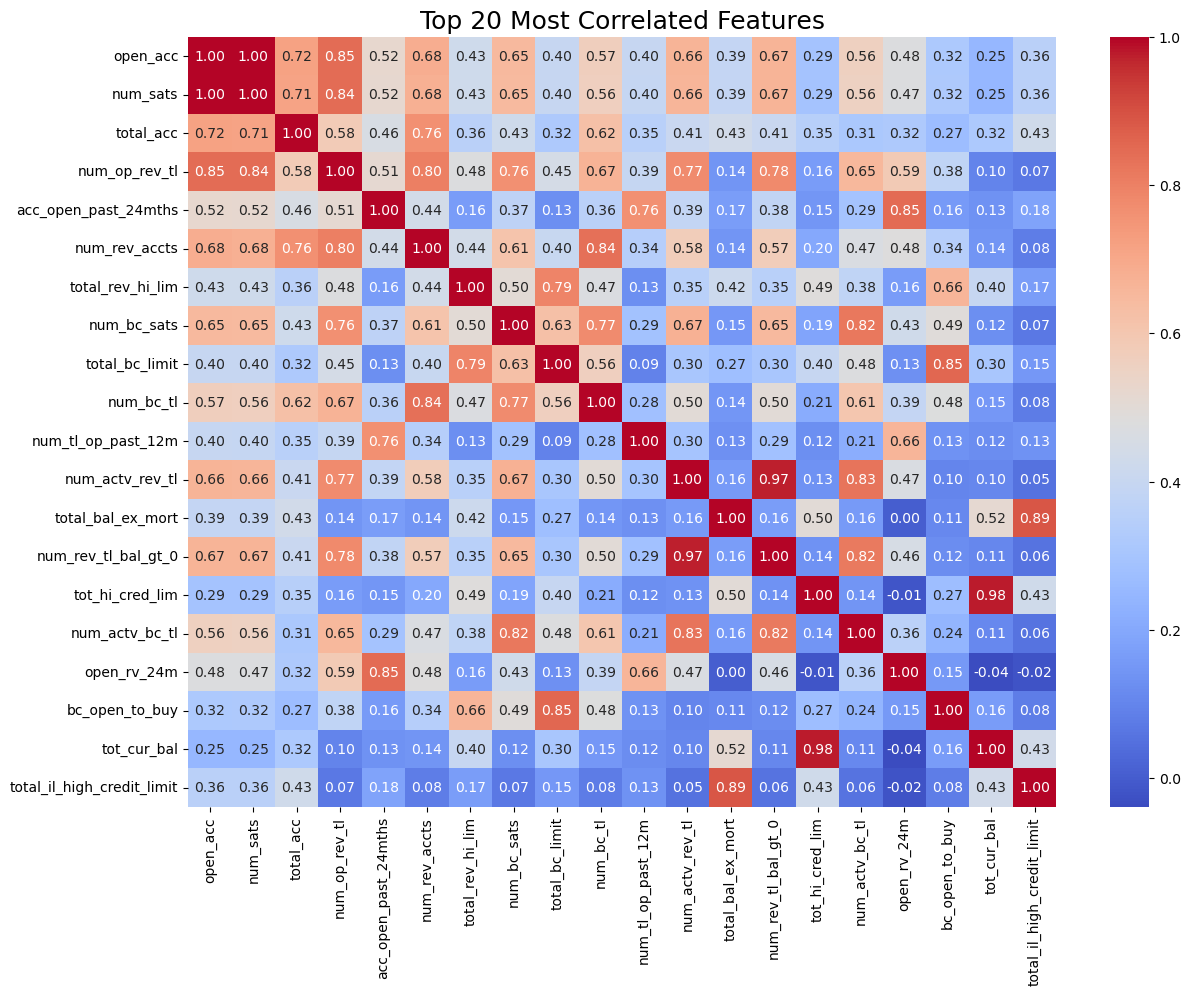

In [158]:
# compute full correlation
corr = df.select_dtypes(include=['float64', 'int64']).corr()

# pick top 20 features with strongest correlations to ANY other feature
corr_abs = corr.abs()
top_features = corr_abs.sum().sort_values(ascending=False).head(20).index

# build smaller matrix
corr_small = corr.loc[top_features, top_features]

plt.figure(figsize=(14, 10))
sns.heatmap(corr_small, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Top 20 Most Correlated Features", fontsize=18)
plt.show()

In [159]:
# correlations with target variable 'loan_status'
target_map = {
    "Fully Paid": 1,
    "Charged Off": 0,
    "Default": 0,
    "Late (31-120 days)": 0,
    "Late (16-30 days)": 0
}

df["target_binary"] = df["loan_status"].map(target_map)

# select numeric features
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# compute correlations
corr_target = numeric_df.corr()["target_binary"].abs().sort_values(ascending=False)

# remove the target itself
corr_target = corr_target.drop("target_binary")

# top 20 correlated features
top10 = corr_target.head(10)

top10

int_rate            0.258199
fico_range_low      0.151243
fico_range_high     0.151239
bc_util             0.112213
revol_util          0.110796
mort_acc            0.110259
bc_open_to_buy      0.105159
percent_bc_gt_75    0.103674
installment         0.102349
funded_amnt_inv     0.098048
Name: target_binary, dtype: float64

/var/folders/c9/4lmf4c5n2q9fnm1238mvpkqc0000gn/T/ipykernel_28319/901750323.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values, y=top10.index, palette="viridis")


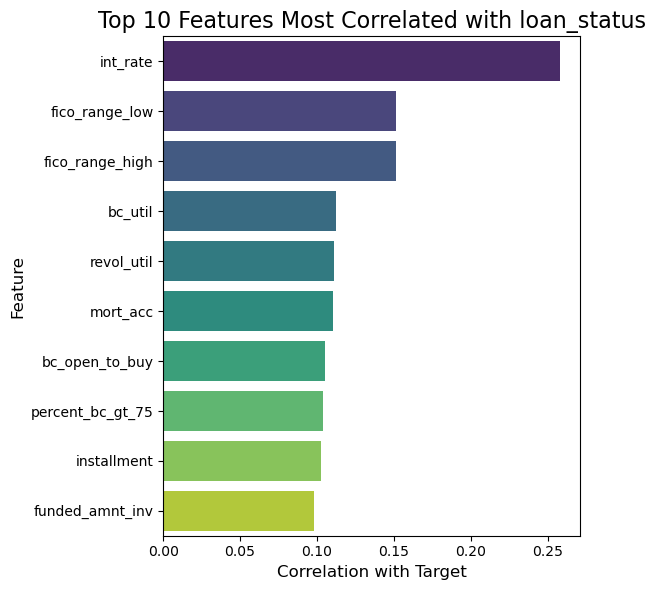

In [160]:
plt.figure(figsize=(6, 6))
sns.barplot(x=top10.values, y=top10.index, palette="viridis")
plt.title("Top 10 Features Most Correlated with loan_status", fontsize=16)
plt.xlabel("Correlation with Target", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()

In [161]:
# drop the fico range high feature because it's redundant with fico range low
df = df.drop(columns=["fico_range_high"])   

In [162]:
df.shape, df.columns

((178817, 83),
 Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
        'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
        'annual_inc', 'verification_status', 'loan_status', 'purpose', 'title',
        'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
        'fico_range_low', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
        'revol_util', 'total_acc', 'initial_list_status',
        'collections_12_mths_ex_med', 'application_type', 'tot_coll_amt',
        'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m',
        'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
        'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
        'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
        'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
        'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
        'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op'

In [163]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,application_type,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,target_binary
0,35000.0,35000.0,35000.0,60 months,12.62,789.57,C,C1,10+ years,MORTGAGE,85000.0,Source Verified,Fully Paid,house,Home buying,NY,12.14,0.0,Apr-1998,680.0,0.0,7.0,1.0,6029.0,30.6,17.0,w,0.0,Individual,0.0,21567.0,1.0,2.0,2.0,3.0,4.0,15538.0,73.0,2.0,3.0,3570.0,53.0,19700.0,0.0,0.0,3.0,6.0,3081.0,12471.0,32.6,0.0,0.0,167.0,233.0,12.0,4.0,2.0,12.0,12.0,0.0,4.0,4.0,4.0,6.0,7.0,5.0,8.0,4.0,7.0,0.0,0.0,0.0,4.0,92.3,25.0,1.0,0.0,40953.0,21567.0,18500.0,21253.0,Cash,1
1,10000.0,10000.0,10000.0,36 months,15.05,346.90,C,C4,1 year,RENT,10000.0,Verified,Fully Paid,debt_consolidation,Debt consolidation,KY,49.94,0.0,Apr-1997,705.0,3.0,13.0,0.0,16253.0,24.7,16.0,w,0.0,Joint App,0.0,16253.0,2.0,0.0,0.0,0.0,NaN,0.0,NaN,4.0,8.0,6581.0,25.0,65700.0,0.0,0.0,5.0,8.0,1250.0,44147.0,26.9,0.0,0.0,NaN,245.0,5.0,5.0,0.0,5.0,5.0,0.0,10.0,10.0,11.0,13.0,0.0,13.0,16.0,10.0,13.0,0.0,0.0,0.0,4.0,100.0,9.1,0.0,0.0,65700.0,16253.0,60400.0,0.0,Cash,1
2,10000.0,10000.0,10000.0,60 months,13.59,230.57,C,C2,3 years,MORTGAGE,58000.0,Not Verified,Fully Paid,debt_consolidation,Debt consolidation,NJ,21.64,0.0,Jan-1984,675.0,0.0,15.0,1.0,11464.0,31.9,47.0,w,0.0,Individual,374.0,146107.0,0.0,2.0,0.0,1.0,16.0,28901.0,87.0,1.0,7.0,6021.0,59.0,35900.0,0.0,0.0,1.0,8.0,10436.0,7485.0,57.0,0.0,0.0,92.0,404.0,12.0,12.0,3.0,24.0,12.0,0.0,3.0,6.0,4.0,17.0,4.0,12.0,40.0,6.0,15.0,0.0,0.0,0.0,1.0,97.4,50.0,1.0,0.0,218992.0,40365.0,17400.0,33092.0,Cash,1
3,1000.0,1000.0,1000.0,36 months,15.05,34.69,C,C4,7 years,RENT,43000.0,Verified,Charged Off,moving,Moving and relocation,MI,19.29,0.0,Nov-2007,695.0,0.0,8.0,0.0,17079.0,43.2,14.0,w,0.0,Individual,0.0,28669.0,2.0,2.0,0.0,1.0,22.0,11590.0,59.0,2.0,4.0,4890.0,49.0,39500.0,0.0,0.0,0.0,5.0,3584.0,19882.0,45.8,0.0,0.0,97.0,118.0,6.0,6.0,0.0,6.0,23.0,0.0,4.0,5.0,5.0,7.0,4.0,6.0,9.0,5.0,8.0,0.0,0.0,0.0,2.0,100.0,20.0,0.0,0.0,59000.0,28669.0,36700.0,19500.0,Cash,0
4,4000.0,4000.0,4000.0,36 months,16.02,140.67,C,C5,NaN,RENT,13000.0,Source Verified,Fully Paid,car,Car financing,CA,11.08,0.0,May-2008,710.0,0.0,2.0,0.0,4184.0,76.1,3.0,w,0.0,Individual,0.0,4184.0,1.0,0.0,0.0,0.0,NaN,0.0,NaN,1.0,1.0,3278.0,76.0,5500.0,0.0,0.0,1.0,1.0,2092.0,1316.0,76.1,0.0,0.0,NaN,112.0,3.0,3.0,0.0,3.0,7.0,0.0,2.0,2.0,2.0,3.0,0.0,2.0,3.0,2.0,2.0,0.0,0.0,0.0,1.0,100.0,50.0,0.0,0.0,5500.0,4184.0,5500.0,0.0,Cash,1


/var/folders/c9/4lmf4c5n2q9fnm1238mvpkqc0000gn/T/ipykernel_28319/3187659463.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


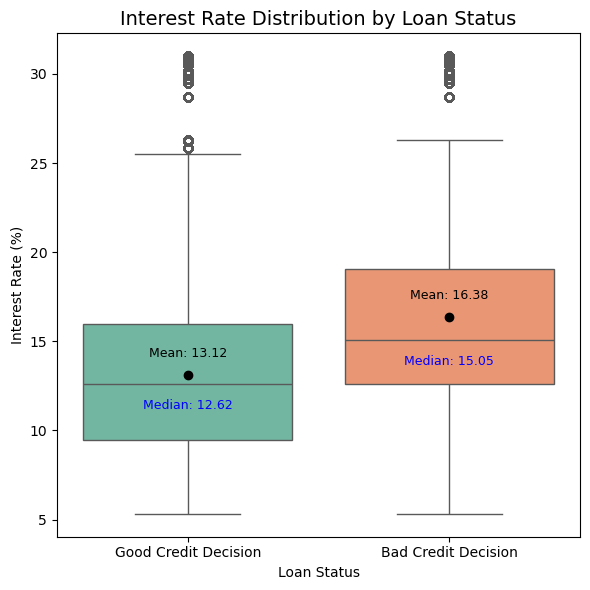

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

# binary mapping (already good)
target_map = {
    "Fully Paid": "Good Credit Decision",
    "Charged Off": "Bad Credit Decision",
    "Default": "Bad Credit Decision",
    "Late (31-120 days)": "Bad Credit Decision",
    "Late (16-30 days)": "Bad Credit Decision"
}

df["loan_status_binary"] = df["loan_status"].map(target_map)

plt.figure(figsize=(6, 6))
ax = sns.boxplot(
    data=df,
    x="loan_status_binary",
    y="int_rate",
    palette="Set2",
    showmeans=True,
    meanprops={"marker": "o",
               "markerfacecolor": "black",
               "markeredgecolor": "black"}
)

plt.title("Interest Rate Distribution by Loan Status", fontsize=14)
plt.xlabel("Loan Status")
plt.ylabel("Interest Rate (%)")

# --- Compute stats per group ---
groups = df.groupby("loan_status_binary")["int_rate"]
means = groups.mean()
medians = groups.median()

# dynamic vertical offset based on y-axis range
ymin, ymax = ax.get_ylim()
offset = (ymax - ymin) * 0.03  # 3% of the range

# ensure consistent order with the x-axis categories
categories = ax.get_xticklabels()
cat_labels = [c.get_text() for c in categories]

for i, cat in enumerate(cat_labels):
    mean_val = means.loc[cat]
    med_val = medians.loc[cat]

    # mean label slightly above the mean dot
    ax.text(
        i, mean_val + offset,
        f"Mean: {mean_val:.2f}",
        ha="center", va="bottom",
        fontsize=9, color="black"
    )

    # median label slightly below the median line
    ax.text(
        i, med_val - offset,
        f"Median: {med_val:.2f}",
        ha="center", va="top",
        fontsize=9, color="blue"
    )

plt.tight_layout()
plt.show()

/var/folders/c9/4lmf4c5n2q9fnm1238mvpkqc0000gn/T/ipykernel_28319/851428786.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


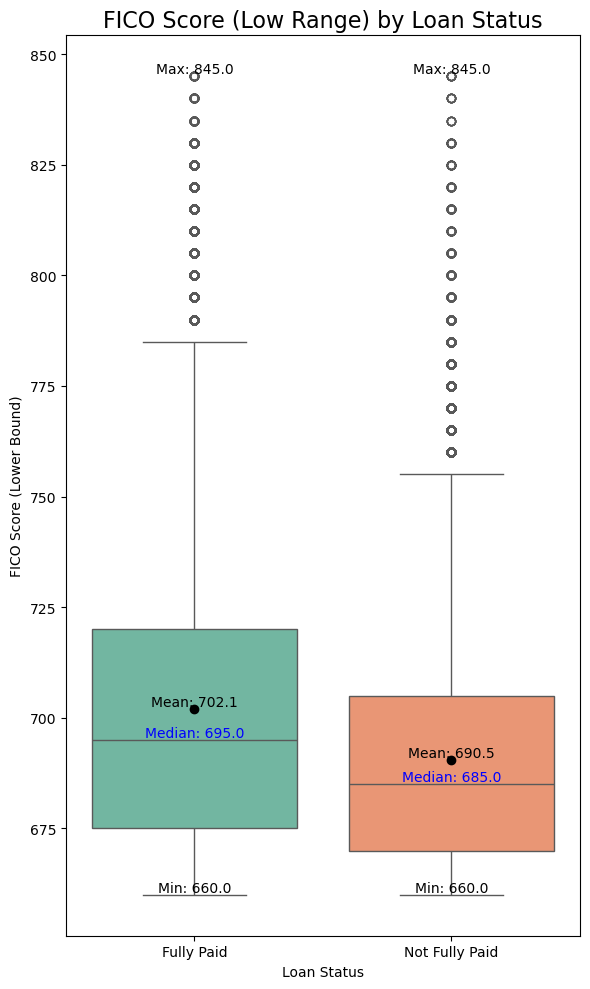

In [165]:
# plot fico score low against loan status

target_map = {
    "Fully Paid": "Fully Paid",
    "Charged Off": "Not Fully Paid",
    "Default": "Not Fully Paid",
    "Late (31-120 days)": "Not Fully Paid",
    "Late (16-30 days)": "Not Fully Paid"
}

df["loan_status_binary"] = df["loan_status"].map(target_map)

plt.figure(figsize=(6, 10))
ax = sns.boxplot(
    data=df,
    x="loan_status_binary",
    y="fico_range_low",   
    palette="Set2",
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black"}
)

plt.title("FICO Score (Low Range) by Loan Status", fontsize=16)
plt.xlabel("Loan Status")
plt.ylabel("FICO Score (Lower Bound)")

# --- Compute statistics ---
groups = df.groupby("loan_status_binary")["fico_range_low"]

means = groups.mean()
medians = groups.median()
mins = groups.min()
maxs = groups.max()

# --- Add labels ---
for i, _ in enumerate(groups):
    x = i

    plt.text(x, means.iloc[i], f"Mean: {means.iloc[i]:.1f}",
             ha="center", va="bottom", fontsize=10, color="black")

    plt.text(x, medians.iloc[i], f"Median: {medians.iloc[i]:.1f}",
             ha="center", va="bottom", fontsize=10, color="blue")

    plt.text(x, mins.iloc[i], f"Min: {mins.iloc[i]:.1f}",
             ha="center", va="bottom", fontsize=10, color="black")

    plt.text(x, maxs.iloc[i], f"Max: {maxs.iloc[i]:.1f}",
             ha="center", va="bottom", fontsize=10, color="black")

plt.tight_layout()
plt.show()

In [166]:
df.shape, df.columns

((178817, 84),
 Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
        'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
        'annual_inc', 'verification_status', 'loan_status', 'purpose', 'title',
        'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
        'fico_range_low', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
        'revol_util', 'total_acc', 'initial_list_status',
        'collections_12_mths_ex_med', 'application_type', 'tot_coll_amt',
        'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m',
        'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
        'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
        'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
        'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
        'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
        'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op'

In [167]:
# save feature_desc_table to a csv
feature_desc_table.to_csv("../data/feature_descriptions.csv", index=False)

In [168]:
# save cleaned EDA dataset
df.to_csv("../data/accepted_2017_eda.csv", index=False)